In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import xgboost as xgb
import dalex as dx

In [2]:
data_res  = pd.read_csv("/Users/48501/Documents/GitHub/projekt_interdyscyplinarny_arimr/WB2_RashomonML/results.csv")
data_res

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__subsample,param_xgb__reg_lambda,param_xgb__reg_alpha,param_xgb__n_estimators,param_xgb__min_child_weight,...,param_xgb__learning_rate,param_xgb__colsample_bytree,param_xgb__colsample_bylevel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,17.138736,0.213329,0.175184,0.003537,0.7,256.000000,16.000000,3751,32,...,0.250000,0.5,0.2,"{'xgb__subsample': 0.7, 'xgb__reg_lambda': 256...",0.889517,0.899097,0.901845,0.896820,0.005284,303
1,1,28.262708,2.509691,0.615060,0.003526,1.0,4.000000,0.015625,4501,4,...,0.000977,0.1,0.8,"{'xgb__subsample': 1.0, 'xgb__reg_lambda': 4, ...",0.895325,0.901165,0.903640,0.900043,0.003486,205
2,2,11.935681,0.128560,0.107310,0.003291,0.9,0.001953,8.000000,4751,2,...,0.250000,0.3,0.1,"{'xgb__subsample': 0.9, 'xgb__reg_lambda': 0.0...",0.889596,0.900869,0.901230,0.897232,0.005401,292
3,3,27.512278,0.690537,0.153098,0.002024,1.0,64.000000,0.250000,4001,128,...,0.250000,0.4,0.9,"{'xgb__subsample': 1.0, 'xgb__reg_lambda': 64,...",0.870729,0.885260,0.883653,0.879881,0.006505,718
4,4,31.702026,0.136257,0.206199,0.001252,0.3,256.000000,1.000000,2001,8,...,0.007812,1.0,0.4,"{'xgb__subsample': 0.3, 'xgb__reg_lambda': 256...",0.886325,0.894491,0.898261,0.893026,0.004982,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,0.044378,0.001343,0.021631,0.016456,0.7,0.003906,0.001953,1,1,...,0.031250,0.6,0.0,"{'xgb__subsample': 0.7, 'xgb__reg_lambda': 0.0...",0.680143,0.659432,0.702031,0.680535,0.017393,1387
1496,1496,29.499646,1.139899,0.148805,0.020640,0.7,0.007812,0.125000,751,16,...,0.015625,0.8,0.6,"{'xgb__subsample': 0.7, 'xgb__reg_lambda': 0.0...",0.898489,0.906660,0.909145,0.904765,0.004552,83
1497,1497,87.327612,1.637326,0.702914,0.031408,0.7,0.007812,0.015625,4751,32,...,0.001953,0.8,0.3,"{'xgb__subsample': 0.7, 'xgb__reg_lambda': 0.0...",0.897143,0.903081,0.905696,0.901973,0.003579,156
1498,1498,4.803960,0.239180,0.072002,0.005139,1.0,16.000000,8.000000,501,32,...,0.062500,0.2,0.7,"{'xgb__subsample': 1.0, 'xgb__reg_lambda': 16,...",0.897984,0.905522,0.905448,0.902985,0.003536,120


Text(0.5, 1.0, 'Resoults distribution')

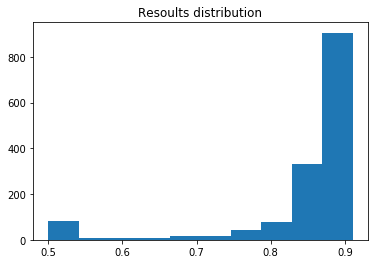

In [3]:
plt.hist(data_res.mean_test_score)
plt.title("Resoults distribution")

Text(0.5, 1.0, 'Number of models depending from cuting point')

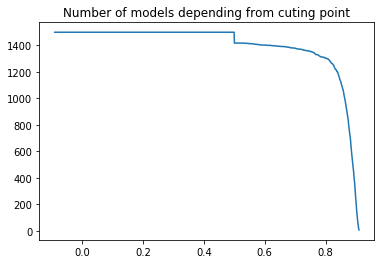

In [4]:
nr_of_models = [ j for j in range(1,1001)]
itera = 0 
for i in range(1,1001):
    nr_of_models[itera] = sum(data_res['mean_test_score'] >= max(data_res.mean_test_score)-i/1000)
    itera +=1 

    
    
plt.plot([ max(data_res.mean_test_score)-j/1000 for j in range(1,1001)],nr_of_models)

plt.title("Number of models depending from cuting point")

In [5]:
# Creating Pca dataFrame 


data_to_pca  = data_res.iloc[:,5:14]
from sklearn.decomposition import PCA

pca =PCA(n_components=2)
pca_data=pca.fit_transform(data_to_pca)

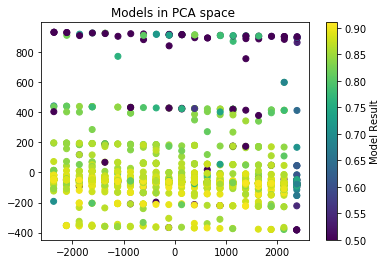

In [6]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=data_res.mean_test_score)
plt.title("Models in PCA space ")
plt.colorbar(label='Model Result')


In [5]:
# Loding data 

full_data = pd.read_csv("/Users/48501/Documents/GitHub/projekt_interdyscyplinarny_arimr/WB2_RashomonML/full_data.csv")

indxs = pd.read_csv("/Users/48501/Documents/GitHub/projekt_interdyscyplinarny_arimr/WB2_RashomonML/iid_keep.csv")
res = []
for i in list(full_data.icustay_id):
    #print(i)
    if i in list(indxs["0"]):
        res.append(True)
    else: 
        res.append(False)


0        200003
1        200006
2        200007
3        200009
4        200012
          ...  
11630    240146
11631    240147
11632    240153
11633    240154
11634    240166
Name: 0, Length: 11635, dtype: int64

In [53]:
xgb_  = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05,n_jobs=1,use_label_encoder=False)

In [92]:
# Best params for top 10 models 

import ast
params=data_res.sort_values(by="rank_test_score").head(200).reset_index().params
params =[params[i] for i in range(0,200,20)]

In [93]:
params

["{'xgb__subsample': 0.8, 'xgb__reg_lambda': 0.0078125, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 3501, 'xgb__min_child_weight': 4, 'xgb__max_depth': 12, 'xgb__learning_rate': 0.00390625, 'xgb__colsample_bytree': 0.5, 'xgb__colsample_bylevel': 0.3}",
 "{'xgb__subsample': 1.0, 'xgb__reg_lambda': 0.25, 'xgb__reg_alpha': 0.03125, 'xgb__n_estimators': 1501, 'xgb__min_child_weight': 2, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.015625, 'xgb__colsample_bytree': 0.4, 'xgb__colsample_bylevel': 0.3}",
 "{'xgb__subsample': 1.0, 'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 2751, 'xgb__min_child_weight': 4, 'xgb__max_depth': 11, 'xgb__learning_rate': 0.00390625, 'xgb__colsample_bytree': 0.8, 'xgb__colsample_bylevel': 1.0}",
 "{'xgb__subsample': 0.2, 'xgb__reg_lambda': 0.0625, 'xgb__reg_alpha': 0.125, 'xgb__n_estimators': 4501, 'xgb__min_child_weight': 1, 'xgb__max_depth': 11, 'xgb__learning_rate': 0.0078125, 'xgb__colsample_bytree': 0.6, 'xgb__colsample_bylevel': 0.4}",


In [55]:
xgb_1 =  xgb_.set_params(**ast.literal_eval(params[0])).fit(full_data.iloc[res,:], label)

titanic_rf_exp = dx.Explainer(xgb_.set_params(**ast.literal_eval(params[0])), 
                    full_data.iloc[res,:], label)

[15:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "xgb__colsample_bylevel", "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 va

C:\Users\48501\AppData\Roaming\Python\Python37\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



AttributeError: 'str' object has no attribute 'keys'

In [94]:
from sklearn.pipeline import Pipeline
xgb_ = Pipeline([("xgb", xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05,n_jobs=1))])

In [96]:
import pickle
with open ('C:/Users/48501/Documents/GitHub/projekt_interdyscyplinarny_arimr/WB2_RashomonML/label', 'rb') as fp:
    label = pickle.load(fp)
label = np.array(label)[res]

In [97]:
params

["{'xgb__subsample': 0.8, 'xgb__reg_lambda': 0.0078125, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 3501, 'xgb__min_child_weight': 4, 'xgb__max_depth': 12, 'xgb__learning_rate': 0.00390625, 'xgb__colsample_bytree': 0.5, 'xgb__colsample_bylevel': 0.3}",
 "{'xgb__subsample': 1.0, 'xgb__reg_lambda': 0.25, 'xgb__reg_alpha': 0.03125, 'xgb__n_estimators': 1501, 'xgb__min_child_weight': 2, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.015625, 'xgb__colsample_bytree': 0.4, 'xgb__colsample_bylevel': 0.3}",
 "{'xgb__subsample': 1.0, 'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 2751, 'xgb__min_child_weight': 4, 'xgb__max_depth': 11, 'xgb__learning_rate': 0.00390625, 'xgb__colsample_bytree': 0.8, 'xgb__colsample_bylevel': 1.0}",
 "{'xgb__subsample': 0.2, 'xgb__reg_lambda': 0.0625, 'xgb__reg_alpha': 0.125, 'xgb__n_estimators': 4501, 'xgb__min_child_weight': 1, 'xgb__max_depth': 11, 'xgb__learning_rate': 0.0078125, 'xgb__colsample_bytree': 0.6, 'xgb__colsample_bylevel': 0.4}",


In [101]:
import warnings
import ast
warnings.warn("this will not show")
list_m = []
for i in range(len(params)):
    xgb_ = xgb_.set_params(**ast.literal_eval(params[i])).fit(full_data.iloc[res,:], label)
    
    
    titanic_rf_exp = dx.Explainer(xgb_, 
                    full_data.iloc[res,:], label,label=f"XGB{i}")
    pd_rf_cat = titanic_rf_exp.model_parts()
    list_m.append(pd_rf_cat)
    gc.collect()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

this will not show

C:\Users\48501\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGB0
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


C:\Users\48501\AppData\Roaming\Python\Python37\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



  -> predicted values  : min = 0.000212, mean = 0.129, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.351, mean = 0.000446, max = 0.687
  -> model_info        : package sklearn

A new explainer has been created!
[21:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGB1
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Acce

  -> predicted values  : min = 0.00291, mean = 0.129, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.875, mean = 0.000358, max = 0.989
  -> model_info        : package sklearn

A new explainer has been created!
[21:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGB9
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accept

In [102]:
for i in list_m:
    i.plot()

creatinine_first_early
urineoutput_sum
gscverbal_last
platelet_last_early
sodium_last_early
meanbp_min
bun_last_early

In [105]:
import warnings
warnings.warn("this will not show")
list_mo = []
for i in range(len([params[i] for i in [0,1,2,3,4,5,7]])):
    xgb_ = xgb_.set_params(**ast.literal_eval(params[i])).fit(full_data.iloc[res,:], label)
    
    titanic_rf_exp = dx.Explainer(xgb_, 
                    full_data.iloc[res,:], label)
    
    pd_rf_cat = titanic_rf_exp.model_profile(N=50,label=f"XGB_TOP_{i}")
    
    list_mo.append(pd_rf_cat)
    gc.collect()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

this will not show

C:\Users\48501\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


C:\Users\48501\AppData\Roaming\Python\Python37\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



  -> predicted values  : min = 0.000212, mean = 0.129, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


Calculating ceteris paribus:   0%|                                                              | 0/94 [00:00<?, ?it/s]

  -> residuals         : min = -0.351, mean = 0.000446, max = 0.687
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 94/94 [00:45<00:00,  2.07it/s]


[21:57:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000424, mean = 0.13, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


Calculating ceteris paribus:   1%|▌                                                     | 1/94 [00:00<00:12,  7.51it/s]

  -> residuals         : min = -0.604, mean = 3.4e-06, max = 0.98
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 94/94 [00:11<00:00,  8.23it/s]


[21:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000312, mean = 0.13, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


Calculating ceteris paribus:   0%|                                                              | 0/94 [00:00<?, ?it/s]

  -> residuals         : min = -0.316, mean = 1.14e-05, max = 0.675
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 94/94 [00:40<00:00,  2.31it/s]


[22:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.22e-05, mean = 0.128, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


Calculating ceteris paribus:   0%|                                                              | 0/94 [00:00<?, ?it/s]

  -> residuals         : min = -0.247, mean = 0.00173, max = 0.477
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 94/94 [00:54<00:00,  1.74it/s]


[22:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000251, mean = 0.129, max = 0.997
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


Calculating ceteris paribus:   1%|▌                                                     | 1/94 [00:00<00:15,  6.07it/s]

  -> residuals         : min = -0.707, mean = 0.00106, max = 0.98
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 94/94 [00:15<00:00,  6.03it/s]


[22:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000652, mean = 0.13, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


Calculating ceteris paribus:   1%|▌                                                     | 1/94 [00:00<00:09,  9.43it/s]

  -> residuals         : min = -0.882, mean = 0.000274, max = 0.991
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 94/94 [00:08<00:00, 10.58it/s]


[22:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Preparation of a new explainer is initiated

  -> data              : 11635 rows 94 cols
  -> target variable   : 11635 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002118F7264C8> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.4e-06, mean = 0.13, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)


Calculating ceteris paribus:   1%|▌                                                     | 1/94 [00:00<00:12,  7.25it/s]

  -> residuals         : min = -0.111, mean = 2.84e-05, max = 0.256
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 94/94 [00:11<00:00,  8.16it/s]


In [108]:
list_mo[0].plot(list_mo[1:7], variables = ["creatinine_first_early",
"urineoutput_sum",
"gscverbal_last",
"platelet_last_early",
"sodium_last_early",
"meanbp_min",
"bun_last_early"])

In [106]:
len(list_mo)

7